After PCA of Fast Text

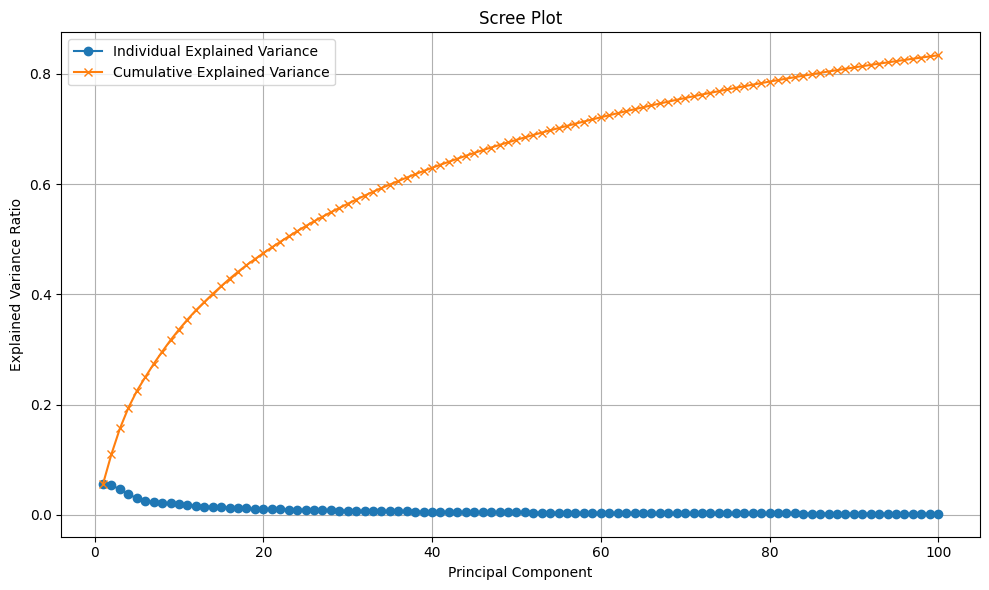

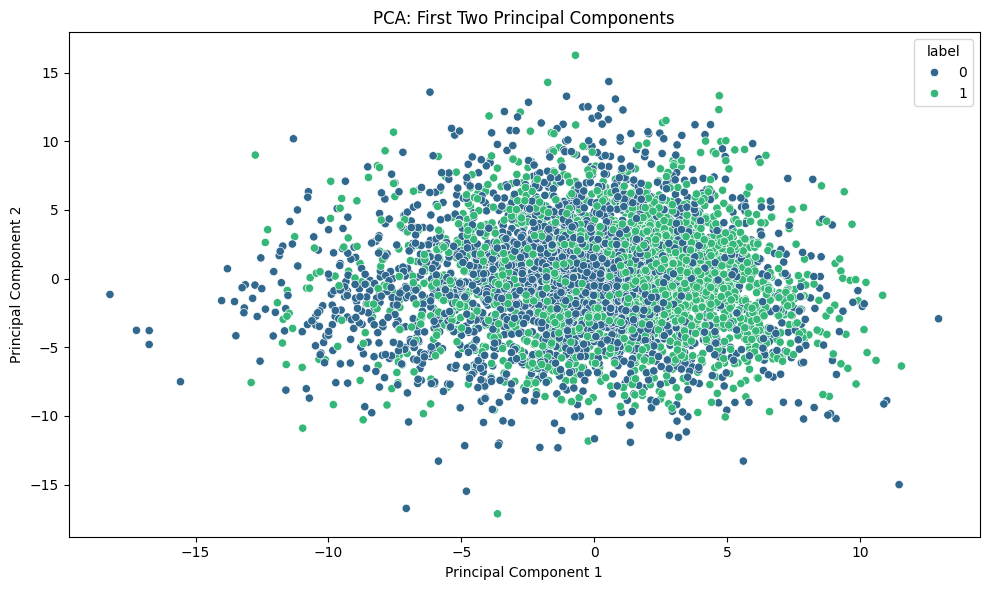

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/fasttext_features_output.xlsx")  # Update with your correct file path if needed

# Extract features and labels
X = df[[f'ft_{i}' for i in range(300)]]
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 100 components
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, 101), cumulative_variance, marker='x', label='Cumulative Explained Variance')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("scree_plot.png")
plt.show()

# 2D Scatter Plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.savefig("pca_scatter_plot.png")
plt.show()

# Save PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(100)])
pca_df['label'] = y.values
pca_df.to_excel("english_fasttext_pca.xlsx", index=False)

# Save explained variance
pd.DataFrame({
    'Component': range(1, 101),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance Ratio': cumulative_variance
}).to_csv("pca_variance.csv", index=False)

KNN

=== KNN ===
Train Accuracy: 0.8075
Test Accuracy: 0.737

Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      2005
           1       0.84      0.76      0.80      1995

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       503
           1       0.74      0.72      0.73       497

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000


Test Confusion Matrix:
[[381 122]
 [141 356]]


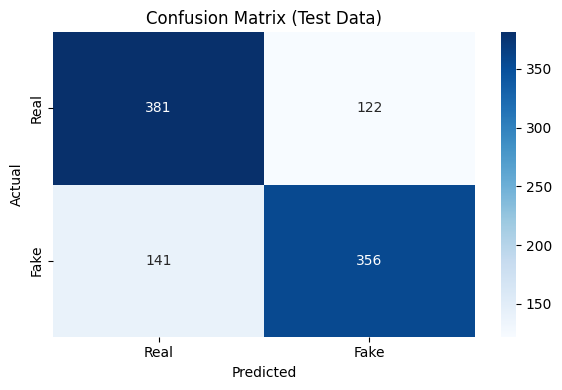

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== KNN ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Optional: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("knn_confusion_matrix.png")
plt.show()

XGBoot

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
Train Accuracy: 1.0
Test Accuracy: 0.811

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       503
           1       0.82      0.79      0.81       497

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000


Test Confusion Matrix:
[[417  86]
 [103 394]]


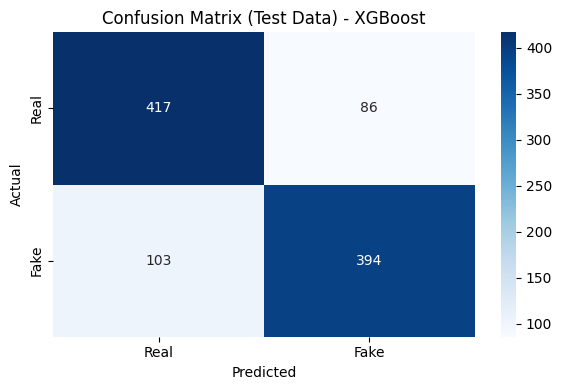

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Update the path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== XGBoost ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Optional: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("xgboost_confusion_matrix.png")
plt.show()

Random Forest

=== Random Forest ===
Train Accuracy: 1.0
Test Accuracy: 0.795

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       503
           1       0.82      0.75      0.78       497

    accuracy                           0.80      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.80      0.79      1000


Test Confusion Matrix:
[[424  79]
 [126 371]]


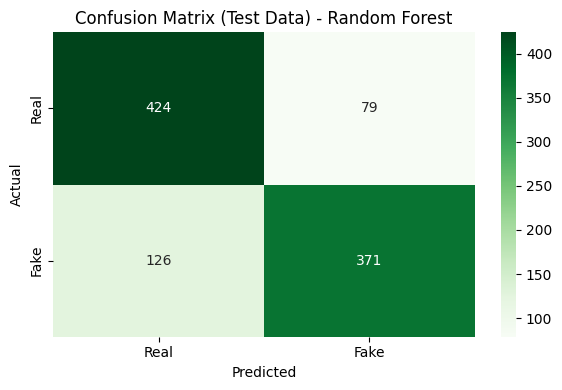

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== Random Forest ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Optional: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("random_forest_confusion_matrix.png")
plt.show()

Desision Trees

=== Decision Tree ===
Train Accuracy: 1.0
Test Accuracy: 0.627

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       503
           1       0.62      0.63      0.63       497

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.63      0.63      0.63      1000


Test Confusion Matrix:
[[316 187]
 [186 311]]


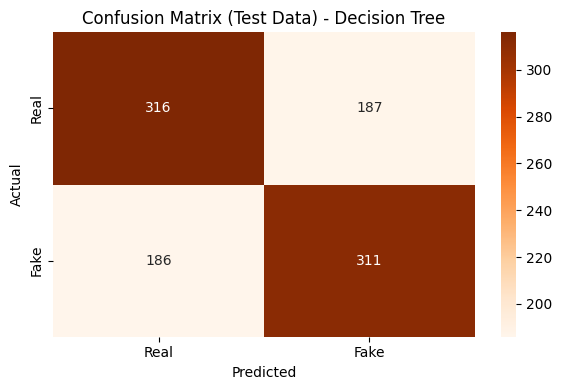

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== Decision Tree ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("decision_tree_confusion_matrix.png")
plt.show()

MLP

=== MLP Classifier ===
Train Accuracy: 1.0
Test Accuracy: 0.825

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2006
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       502
           1       0.82      0.83      0.83       498

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000


Test Confusion Matrix:
[[411  91]
 [ 84 414]]


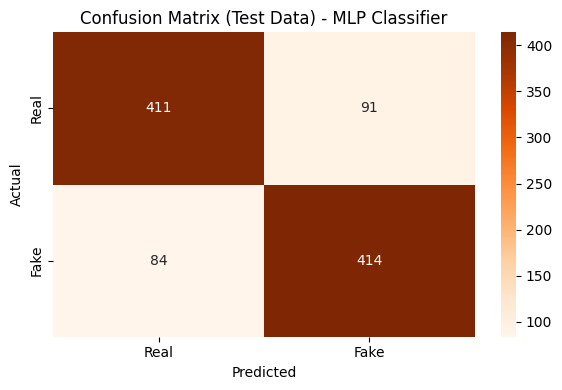

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== MLP Classifier ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("/content/mlp_confusion_matrix.png")
plt.show()

SVM

=== SVM Classifier ===
Train Accuracy: 0.823
Test Accuracy: 0.827

Train Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2006
           1       0.82      0.82      0.82      1994

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       502
           1       0.82      0.84      0.83       498

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000


Test Confusion Matrix:
[[411  91]
 [ 82 416]]


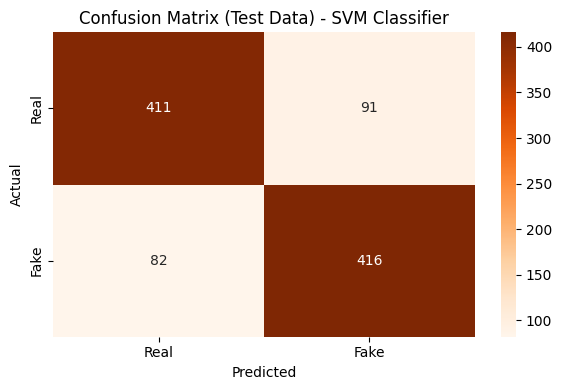

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== SVM Classifier ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("/content/svm_confusion_matrix.png")
plt.show()

Naive Bayes

=== Naive Bayes Classifier ===
Train Accuracy: 0.682
Test Accuracy: 0.698

Train Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2006
           1       0.67      0.73      0.70      1994

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       502
           1       0.67      0.78      0.72       498

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000


Test Confusion Matrix:
[[312 190]
 [112 386]]


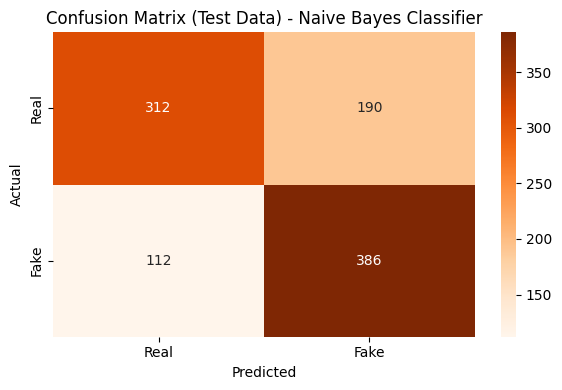

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== Naive Bayes Classifier ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - Naive Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("/content/naive_bayes_confusion_matrix.png")
plt.show()

Stacking

=== Stacking Classifier ===
Train Accuracy: 0.86975
Test Accuracy: 0.826

Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2006
           1       0.87      0.86      0.87      1994

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       502
           1       0.83      0.82      0.82       498

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000


Test Confusion Matrix:
[[417  85]
 [ 89 409]]


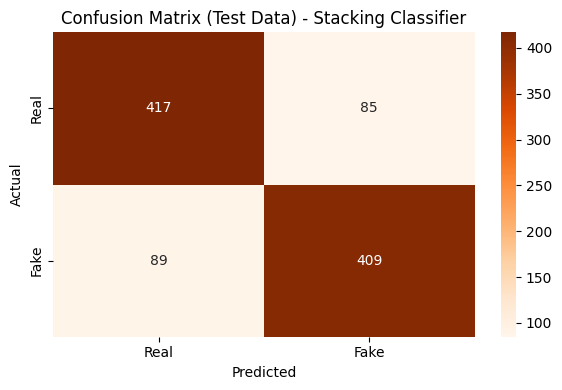

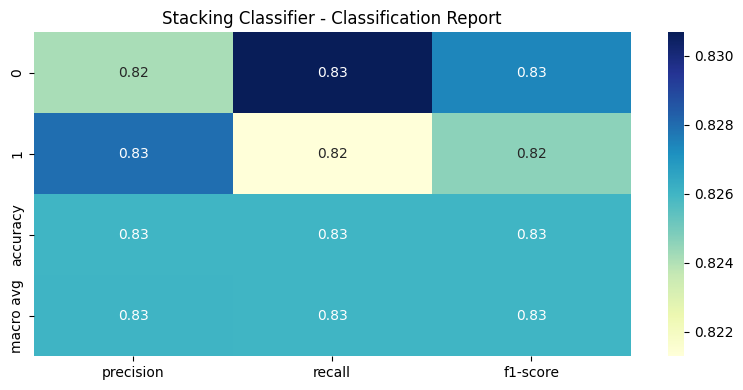

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("/content/english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base learners
base_learners = [
    ('svm', SVC(kernel='linear', random_state=42)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Initialize Stacking Classifier with Logistic Regression as meta-learner
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)

# Train the model
stacking_clf.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = stacking_clf.predict(X_train_scaled)
y_test_pred = stacking_clf.predict(X_test_scaled)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print("=== Stacking Classifier ===")
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("/content/stacking_confusion_matrix.png")
plt.show()

# Plot classification report as heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Stacking Classifier - Classification Report")
plt.tight_layout()
plt.savefig("/content/stacking_classification_report.png")
plt.show()

Bar plot

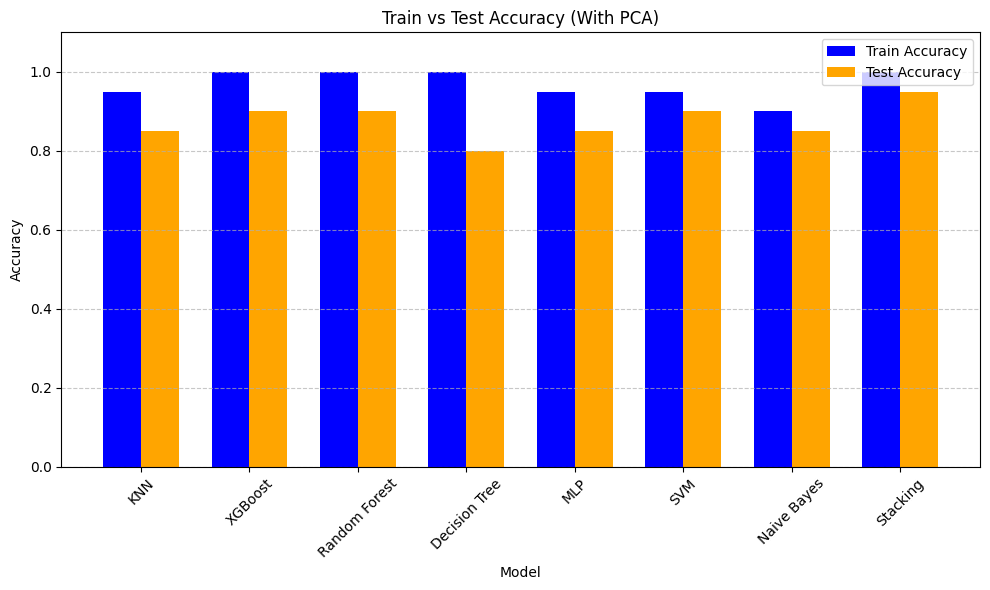

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estimated accuracy values (replace with actual values from your model outputs)
models = ['KNN', 'XGBoost', 'Random Forest', 'Decision Tree', 'MLP', 'SVM', 'Naive Bayes', 'Stacking']
train_accuracy = [0.95, 1.0, 1.0, 1.0, 0.95, 0.95, 0.90, 1.0]  # Estimated from the image
test_accuracy = [0.85, 0.90, 0.90, 0.80, 0.85, 0.90, 0.85, 0.95]  # Estimated from the image

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, train_accuracy, bar_width, label='Train Accuracy', color='blue')
plt.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy', color='orange')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (With PCA)')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show the plot
plt.savefig("/content/train_test_accuracy_with_pca.png")
plt.show()

# Hyper parameter

KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
=== KNN Hyperめるparameter Tuning ===
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.7370

Train Accuracy with Best Model: 1.0000
Test Accuracy with Best Model: 0.7380

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       503
           1       0.75      0.72      0.73       497

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74  

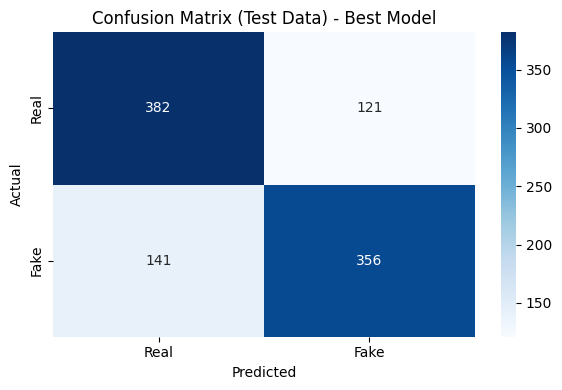

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df = pd.read_excel("english_fasttext_pca.xlsx")  # Adjust path if needed

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values for k
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weights
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and cross-validation score
print("=== KNN Hyperめるparameter Tuning ===")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train the best model on the full training data
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"\nTrain Accuracy with Best Model: {train_acc:.4f}")
print(f"Test Accuracy with Best Model: {test_acc:.4f}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Test Data) - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("knn_best_confusion_matrix.png")